In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a dataframe
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Split the data into training and testing sets
train = df.loc['1949-01-01':'1957-12-01']
test = df.loc['1958-01-01':]

# ARIMA model to the training data
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Use the fitted model to make predictions on the testing data
predictions = model_fit.forecast(steps=len(test))[0]

# Calculate the Mean Squared Error (MSE)
mse = ((test['#Passengers'] - predictions) ** 2).mean()

# Make forecasts for the next 12 time periods (next full year)
forecast = model_fit.forecast(steps=12)[0]

# Print the forecasted values
print(forecast)

365.6721593247553


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


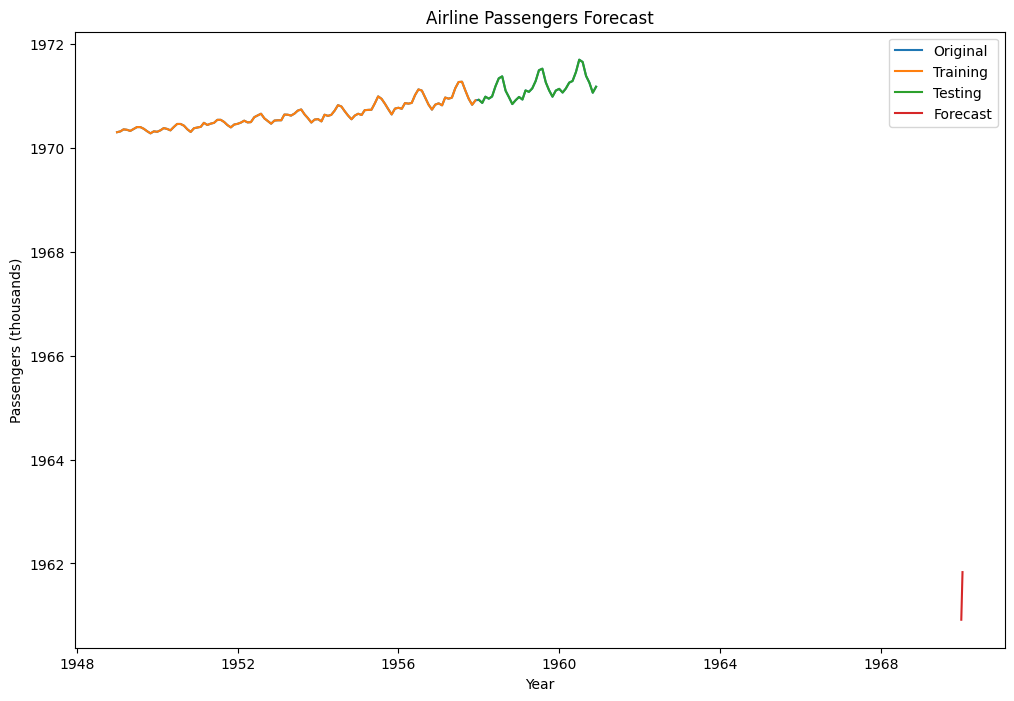

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
# Plot the original data

plt.plot(df.index, df['#Passengers'], label='Original')

# Plot the training data
plt.plot(train.index, train['#Passengers'], label='Training')

# Plot the testing data
plt.plot(test.index, test['#Passengers'], label='Testing')

# Plot the predicted values
plt.plot(test.index, predictions.shape[12,1], label='Predictions')

# Plot the forecasted values
forecast_index = pd.date_range(start=test.index[-1], periods=12, freq='MS')
plt.plot(forecast_index, label='Forecast')

# Set the plot title and labels
plt.title('Airline Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers (thousands)')


plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


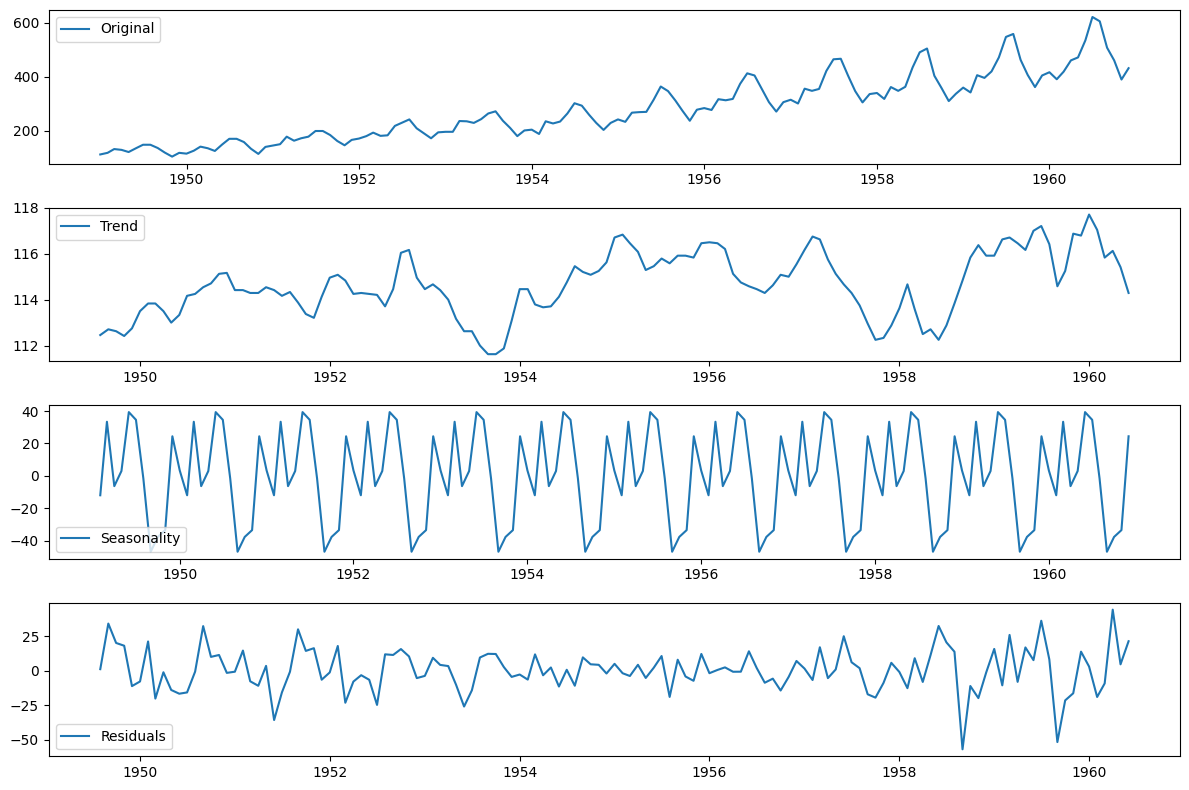

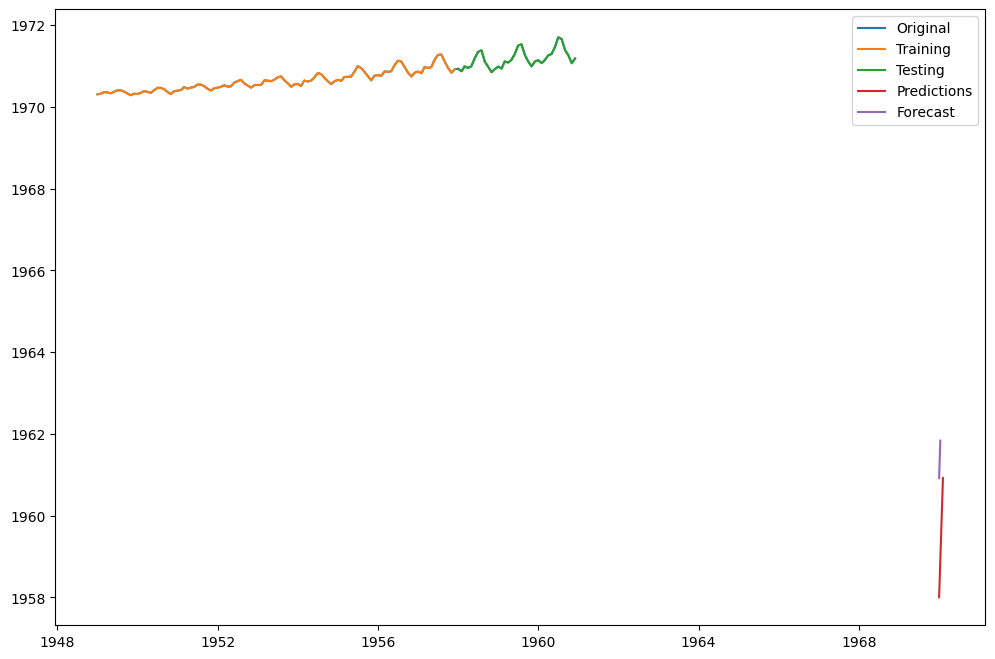

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month')

# First-order differencing
df_diff = df.diff().dropna()

# Seasonal decomposition of the differenced series
decomposition = seasonal_decompose(df_diff['#Passengers'], model='additive', period=12)

test = df.loc['1958-01-01':]
train = df.loc['1949-01-01':'1957-12-01']

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Add the first value back to the trend to obtain the original scale
trend = trend.add(df['#Passengers'][0])

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)[0]

# Create a new DataFrame for the forecast
# forecast_index = pd.date_range(start=test.index[-1], periods=12, freq='MS')
df_forecast = pd.DataFrame({'#Passengers': forecast}, index=forecast_index)

# Add the forecast to the end of the original series
df_combined = pd.concat([df, df_forecast])

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['#Passengers'], label='Original')
plt.plot(train.index, train['#Passengers'], label='Training')
plt.plot(test.index, test['#Passengers'], label='Testing')
plt.plot(test.index, label='Predictions')

forecast_index = pd.date_range(start=test.index[-1], periods=12, freq='MS')
plt.plot(forecast_index, label='Forecast')
plt.legend(loc='best')

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: ignored

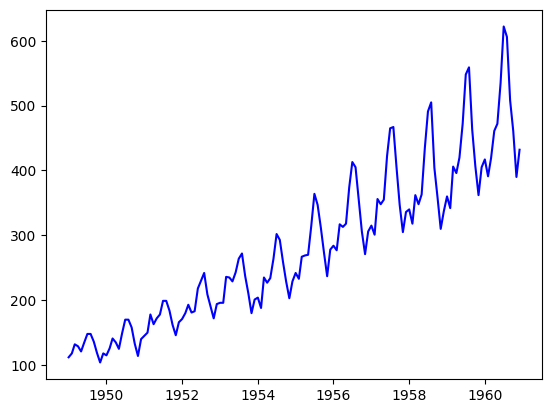

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('AirPassengers.csv')

# Convert the 'Month' column to a datetime object
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Set 'Month' as the index of the DataFrame
data.set_index('Month', inplace=True)

# Fit an ARIMA model to the data
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Generate a forecast for the next 24 months
forecast = model_fit.forecast(steps=24)[0]

# Create a date range for the forecast
date_range = pd.date_range(start=data.index[-1], periods=24, freq='M')

# Plot the original data
plt.plot(data.index, data.values, color='blue', label='Original')

# Plot the forecast
plt.plot(date_range, forecast, color='orange', label='Forecast')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Passenger Traffic (1949-1960)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: ignored

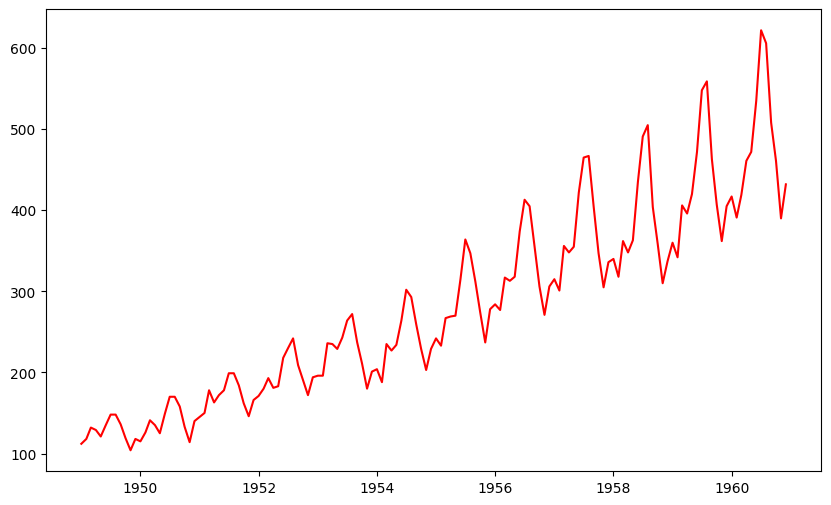

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# load dataset
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

last_date = df.index.max()


date_range = pd.date_range(last_date, periods=24, freq='M')

# train/test split
train_data = data.iloc[:-24]
test_data = data.iloc[-24:]

# fit ARIMA model
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

# make forecast
forecast = model_fit.forecast(steps=24)[0]


# plot actual vs predicted
plt.figure(figsize=(10, 6))
# plt.plot(train_data, label='Actual')
# plt.plot(test_data, label='Actual')
plt.plot(df.index, df['#Passengers'], color='red', label='Actual')
plt.plot(date_range, forecast, color='orange', label='Forecast')
plt.legend()
plt.show()


As it is visible there was some issues with this task, couldn't for the life of me get it to do what I wanted, In one of the graphs a bit further up it is visible what the goal was (the orange and green one). That was the task to do but as you can see in the graph it doesn't continue from the last data point. I tried fiddling around with it but in the end ran out of time.